In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.layers import BatchNormalization,Dropout,Activation,Input,GlobalAveragePooling2D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
picture_size = 48

In [4]:
folder_path = "C:/Users/Kannan T/Documents/DATA SET/sign language"

In [5]:
batch_size = 128

In [6]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.3)

In [7]:
train_set = datagen.flow_from_directory(folder_path ,target_size = (picture_size,picture_size),
                                              color_mode = "grayscale", batch_size = batch_size, class_mode = 'categorical', subset = 'training')

Found 29400 images belonging to 35 classes.


In [8]:
validation_set = datagen.flow_from_directory(folder_path,target_size = (picture_size,picture_size),
                                              color_mode = "grayscale", batch_size = batch_size, class_mode = 'categorical',subset = 'validation')

Found 12600 images belonging to 35 classes.


In [9]:
from keras.optimizers import Adam

In [10]:
no_of_classes = 35
model = Sequential()

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) #64 filters and 3 by 3 size
model.add(BatchNormalization())
model.add(Activation('relu')) #activation layer is present at the end of the neuron, decides which word data should be fired to the next layer
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling extracts the important info and details(curves) at that given area
model.add(Dropout(0.25)) #dropout is used to prevent the model from getting overfitted

#2nd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam (learning_rate = 0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Kannan T\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,362,019 (16.64 MB)

 Trainable params: 4,358,051 (16.62 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [16]:
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

file_path = "sign_language_detector.keras"

checkpoint = ModelCheckpoint(filepath = file_path,monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [checkpoint, early_stopping, reduce_learningrate]

In [17]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=7,
                                validation_data = validation_set,
                                validation_steps = validation_set.n//validation_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/7


C:\Users\Kannan T\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


229/229 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.8903 - loss: 0.4185 - val_accuracy: 0.0286 - val_loss: 28.7966 - learning_rate: 0.0100
Epoch 2/7


C:\Users\Kannan T\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/229 ━━━━━━━━━━━━━━━━━━━━ 5:54 2s/step - accuracy: 1.0000 - loss: 2.4391e-04

C:\Users\Kannan T\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 2.4391e-04 - val_accuracy: 0.0179 - val_loss: 29.6298 - learning_rate: 0.0100
Epoch 3/7
229/229 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.9977 - loss: 0.0079 - val_accuracy: 0.1350 - val_loss: 9.9662 - learning_rate: 0.0100
Epoch 4/7
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.0893 - val_loss: 11.0347 - learning_rate: 0.0100
Epoch 5/7
229/229 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.9989 - loss: 0.0050 - val_accuracy: 0.8058 - val_loss: 1.5217 - learning_rate: 0.0100
Epoch 6/7
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0113 - val_accuracy: 0.7857 - val_loss: 1.7158 - learning_rate: 0.0100
Epoch 7/7
229/229 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9959 - val_loss: 0.0125 - learning_rate: 0.0100
Restoring model weights from the end of the best epoch: 7.


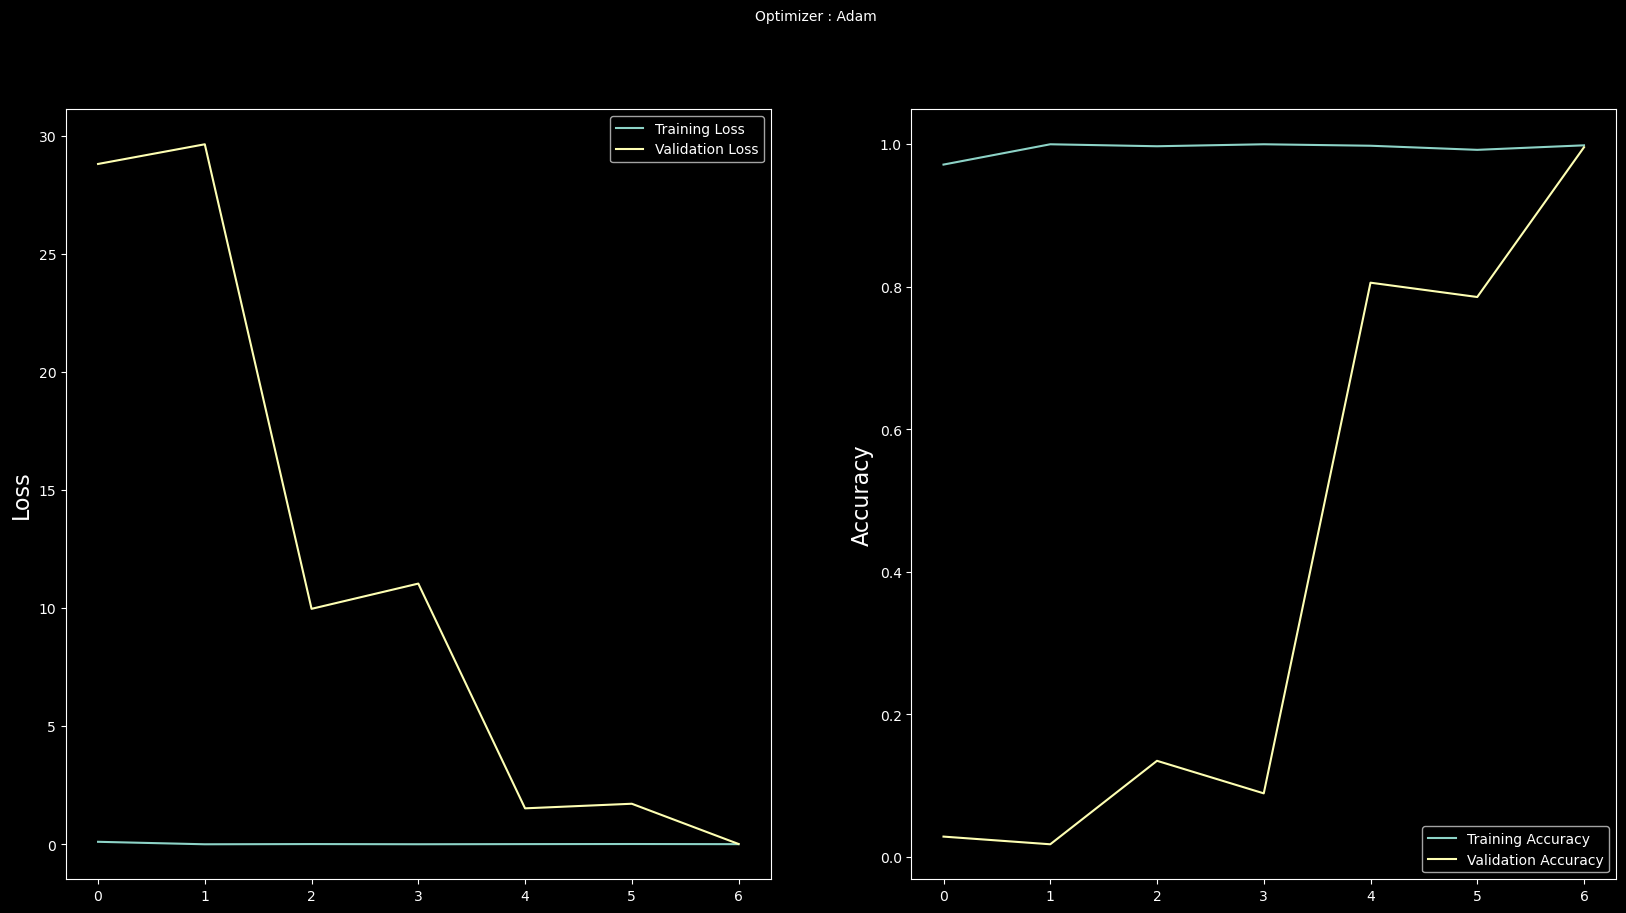

In [18]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


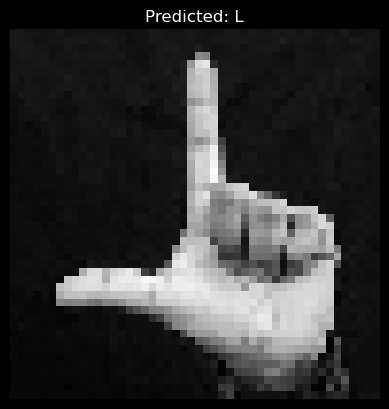

In [25]:
def predict_and_plot_image(image_path, model, class_labels):
    img = load_img(image_path, target_size=(picture_size, picture_size), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    plt.imshow(img_array[0, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {class_labels[predicted_class]}')
    plt.axis('off')
    plt.show()

# Example usage
class_labels = list(train_set.class_indices.keys())
image_path = 'C:/Users/Kannan T/Documents/DATA SET/sign language/L/20.jpg'
predict_and_plot_image(image_path, model, class_labels)

In [26]:
model.save('sign_language_classifier_model.keras')